In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [482]:
df = pd.read_csv("HealthCareDataSet - Sheet1.csv")

In [483]:
df.head(5)

,Id,LengthOfStay,ReadmissionCount,Gender,FacilityId,KidneyAilments,HeartAilments,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
0,13564856414,5,2.0,F,1338,NaN,NaN,False,None,32.7,152.0,64.0,2.0
1,13564856415,3,1.0,F,4964,NaN,NaN,True,None,31.1,165.0,105.0,1.0
2,13564856416,6,NaN,M,7593,NaN,NaN,False,None,32.4,111.0,53.0,NaN
3,13564856417,5,NaN,M,1739,NaN,NaN,False,None,31.2,175.0,44.0,3.0
4,13564856418,5,NaN,M,1703,NaN,NaN,False,Yes,31.9,114.0,93.0,4.0


In [484]:
df.shape

(10999, 13)

In [485]:
df.isnull().sum()

Id                           0
LengthOfStay                 0
ReadmissionCount          5570
Gender                       0
FacilityId                   0
KidneyAilments           10999
HeartAilments            10999
PyschologicalAilments        0
SubstanceAbuseHistory      392
BMI                          2
ABG                          0
Pulse                        2
SecondaryDiagnosis         239
dtype: int64

In [486]:
df.drop(columns=['Id', 'KidneyAilments', 'HeartAilments'], inplace=True)

In [487]:
df.isnull().sum()

LengthOfStay                0
ReadmissionCount         5570
Gender                      0
FacilityId                  0
PyschologicalAilments       0
SubstanceAbuseHistory     392
BMI                         2
ABG                         0
Pulse                       2
SecondaryDiagnosis        239
dtype: int64

In [488]:
# Dropping the null values in SecondaryDiagnosis column
df = df[~df['SecondaryDiagnosis'].isnull()]

In [489]:
df['ReadmissionCount'].fillna(0.0, inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Pulse'].fillna(df['Pulse'].mean(), inplace=True)
df['SecondaryDiagnosis'].fillna(0.0, inplace=True)


In [490]:
df.count()

LengthOfStay             10760
ReadmissionCount         10760
Gender                   10760
FacilityId               10760
PyschologicalAilments    10760
SubstanceAbuseHistory    10377
BMI                      10760
ABG                      10760
Pulse                    10760
SecondaryDiagnosis       10760
dtype: int64

In [491]:
df['SubstanceAbuseHistory'].value_counts(dropna=False)

None       8890
Yes        1477
NaN         383
Some          3
Slight        3
Few           3
Unknown       1
Name: SubstanceAbuseHistory, dtype: int64

In [492]:
df['SubstanceAbuseHistory'].fillna('Unknown', inplace=True)

In [493]:
numerical_columns = ['ReadmissionCount', 'FacilityId', 'BMI', 'ABG', 'Pulse']

In [494]:
df.dtypes

LengthOfStay               int64
ReadmissionCount         float64
Gender                    object
FacilityId                 int64
PyschologicalAilments       bool
SubstanceAbuseHistory     object
BMI                      float64
ABG                      float64
Pulse                    float64
SecondaryDiagnosis       float64
dtype: object

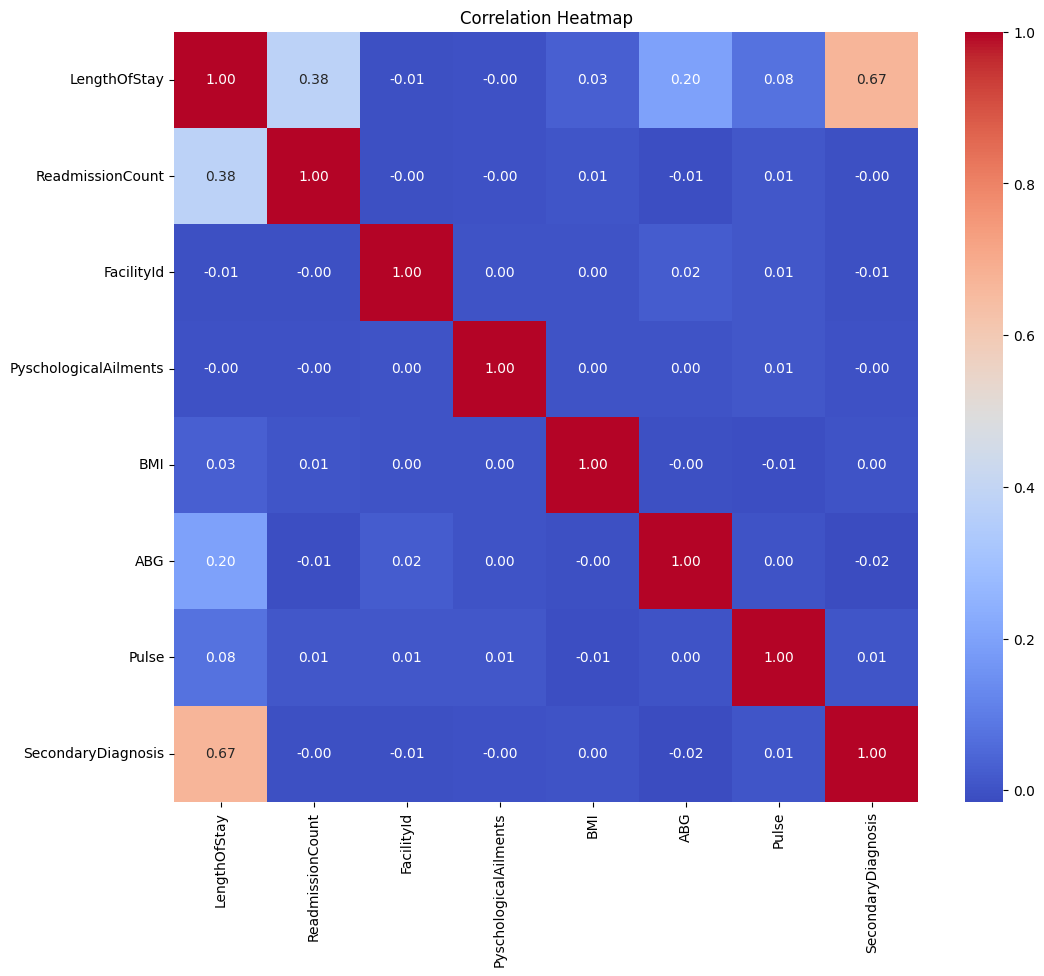

In [495]:
import seaborn as sns

# Heatmap of correlations before feature engineering
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

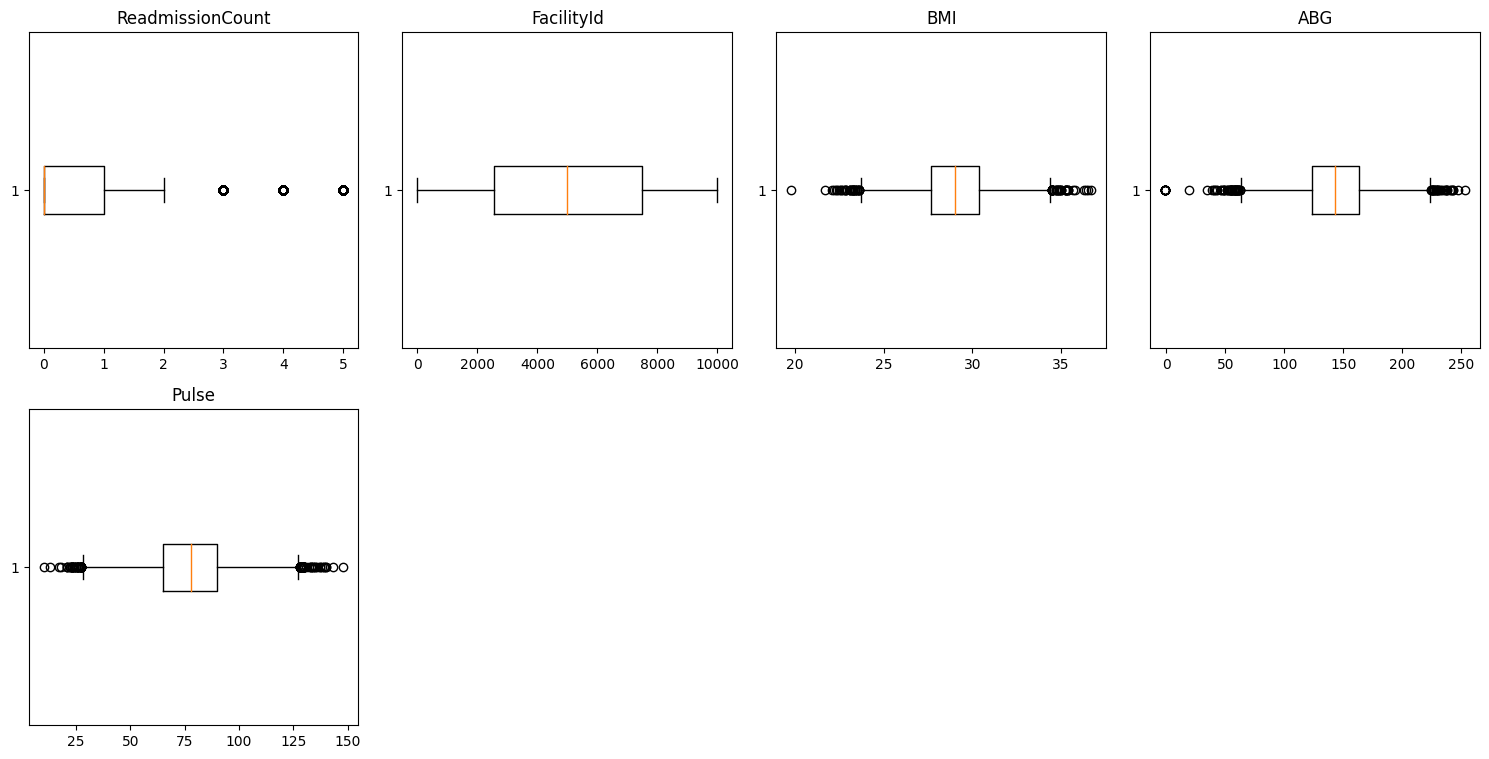

In [496]:
## Now we have identified the outliers. Lets work on it and remove those outliers
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df[col], vert=False)
    plt.title(col)

plt.tight_layout() 
plt.show()

In [497]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [498]:
outlier = (df[numerical_columns] < Q1 + 1.5 * IQR ) | (df[numerical_columns] > Q3 + 1.5 * IQR)

In [499]:
outlier.sum()

ReadmissionCount     9363
FacilityId          10728
BMI                  9807
ABG                  9803
Pulse                9886
dtype: int64

In [500]:
''' 
There are different approach to deal with outliers
Like removing rows or column having higher outliers but in that case we might lose important information
So the best thing would be capping where we set the lower and upper threshold value and reduce the 
value of outlier to our threshold value 
'''
for col in  numerical_columns:
    lower_threshold = df[col].quantile(0.01)
    upper_threshold = df[col].quantile(0.99)

    df[col] = np.where(df[col] < lower_threshold, lower_threshold, df[col])
    df[col] = np.where(df[col] > upper_threshold, upper_threshold, df[col])

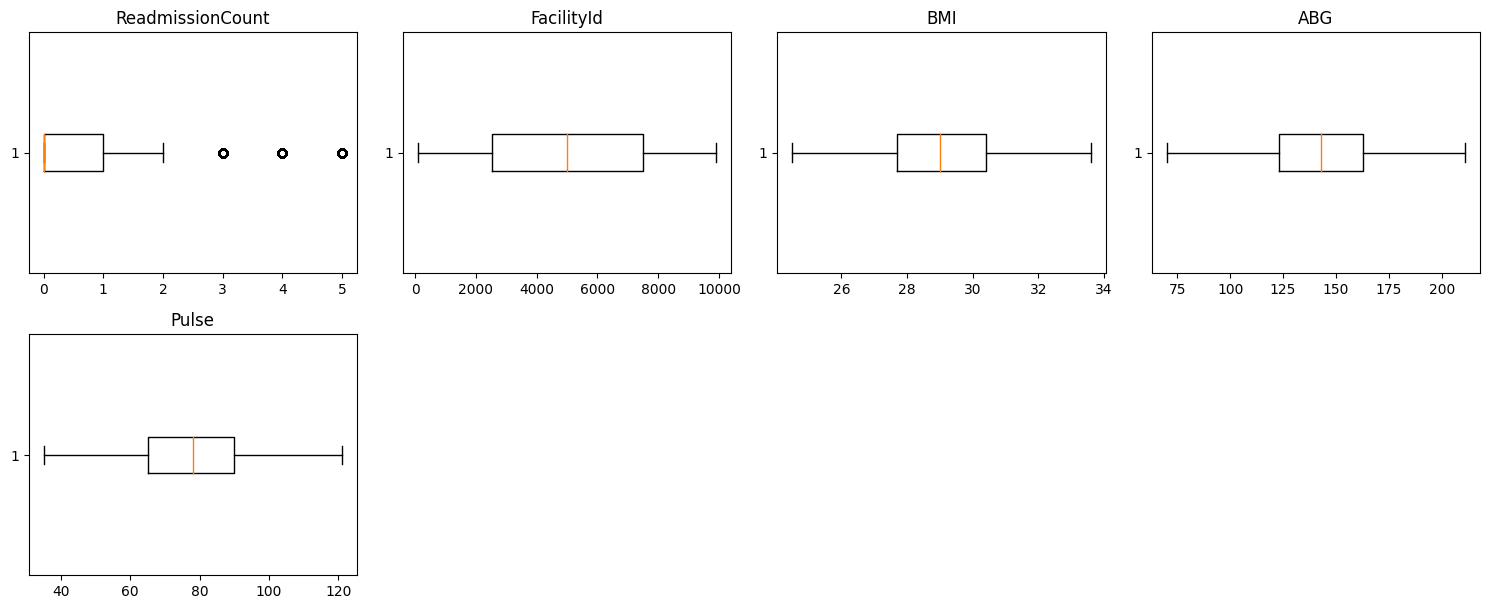

In [501]:
# Re-plotting box plots for each numerical feature to visualize the impact of capping
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i) 
    plt.boxplot(df[col], vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()

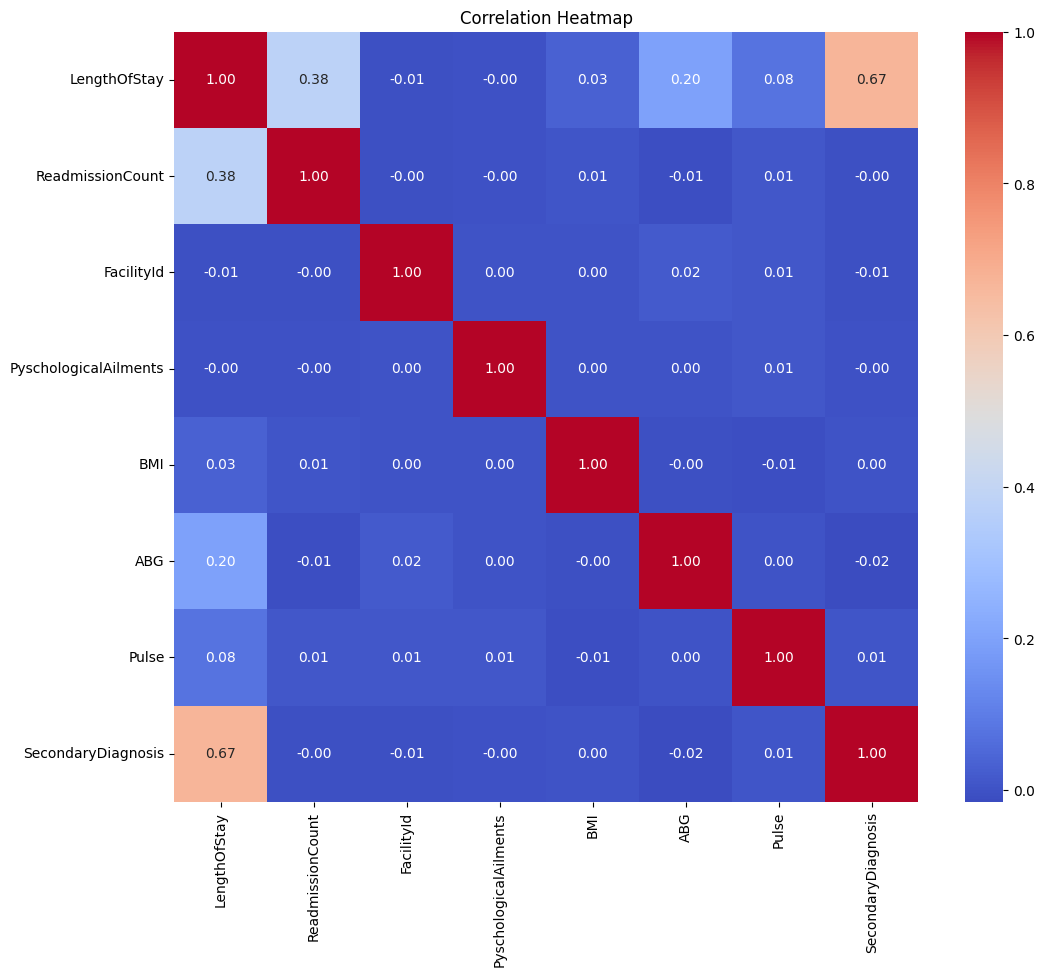

In [502]:
import seaborn as sns

# Heatmap of correlations before feature engineering
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

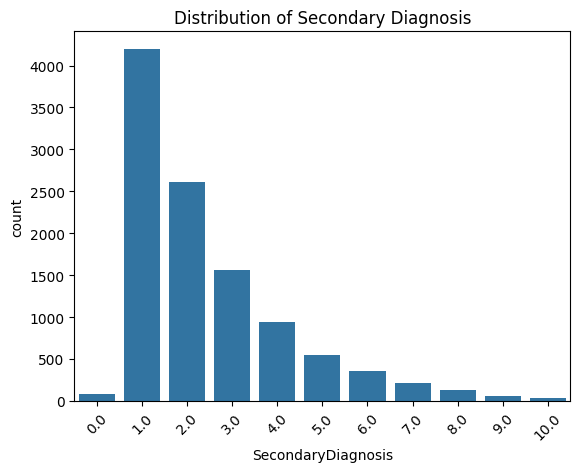

In [503]:
sns.countplot(x='SecondaryDiagnosis', data=df)
plt.title('Distribution of Secondary Diagnosis')
plt.xticks(rotation=45)
plt.show()

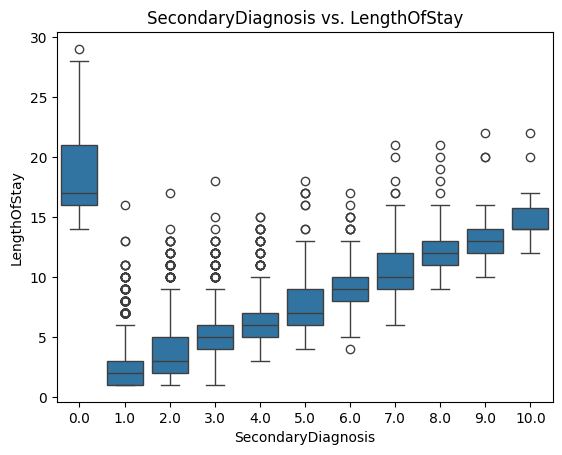

In [504]:
sns.boxplot(x='SecondaryDiagnosis', y='LengthOfStay', data=df)
plt.title('SecondaryDiagnosis vs. LengthOfStay')
plt.show()


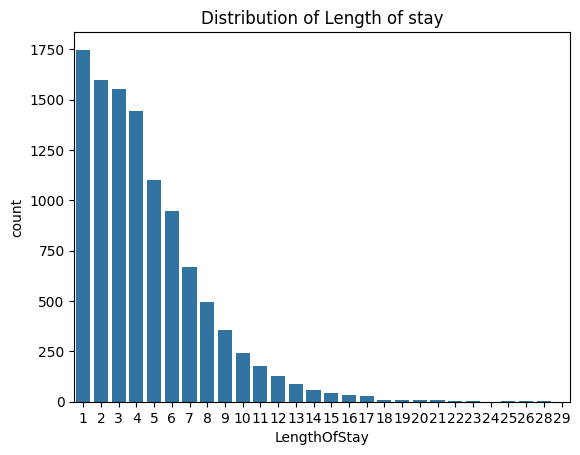

In [505]:
sns.countplot(x='LengthOfStay', data=df)
plt.title('Distribution of Length of stay')
plt.show()


In [506]:
df.columns

Index(['LengthOfStay', 'ReadmissionCount', 'Gender', 'FacilityId',
       'PyschologicalAilments', 'SubstanceAbuseHistory', 'BMI', 'ABG', 'Pulse',
       'SecondaryDiagnosis'],
      dtype='object')

In [507]:
df.drop(columns=['FacilityId'], inplace=True)

In [508]:
df.columns

Index(['LengthOfStay', 'ReadmissionCount', 'Gender', 'PyschologicalAilments',
       'SubstanceAbuseHistory', 'BMI', 'ABG', 'Pulse', 'SecondaryDiagnosis'],
      dtype='object')

In [509]:
numerical_columns = [columns for columns in numerical_columns if columns != 'FacilityId']
categorical_columns = ['Gender', 'SubstanceAbuseHistory', 'PyschologicalAilments', 'SecondaryDiagnosis']

In [510]:
df = pd.get_dummies(df, columns=categorical_columns)

In [511]:
df.head(5)

,LengthOfStay,ReadmissionCount,BMI,ABG,Pulse,Gender_F,Gender_M,SubstanceAbuseHistory_Few,SubstanceAbuseHistory_None,SubstanceAbuseHistory_Slight,...,SecondaryDiagnosis_1.0,SecondaryDiagnosis_2.0,SecondaryDiagnosis_3.0,SecondaryDiagnosis_4.0,SecondaryDiagnosis_5.0,SecondaryDiagnosis_6.0,SecondaryDiagnosis_7.0,SecondaryDiagnosis_8.0,SecondaryDiagnosis_9.0,SecondaryDiagnosis_10.0
0,5,2.0,32.7,152.0,64.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,3,1.0,31.1,165.0,105.0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,5,0.0,31.2,175.0,44.0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,5,0.0,31.9,114.0,93.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,8,1.0,25.2,142.0,79.0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [512]:
y = df['LengthOfStay']
X = df.drop(columns=['LengthOfStay'])
X.columns

Index(['ReadmissionCount', 'BMI', 'ABG', 'Pulse', 'Gender_F', 'Gender_M',
       'SubstanceAbuseHistory_Few', 'SubstanceAbuseHistory_None',
       'SubstanceAbuseHistory_Slight', 'SubstanceAbuseHistory_Some',
       'SubstanceAbuseHistory_Unknown', 'SubstanceAbuseHistory_Yes',
       'PyschologicalAilments_False', 'PyschologicalAilments_True',
       'SecondaryDiagnosis_0.0', 'SecondaryDiagnosis_1.0',
       'SecondaryDiagnosis_2.0', 'SecondaryDiagnosis_3.0',
       'SecondaryDiagnosis_4.0', 'SecondaryDiagnosis_5.0',
       'SecondaryDiagnosis_6.0', 'SecondaryDiagnosis_7.0',
       'SecondaryDiagnosis_8.0', 'SecondaryDiagnosis_9.0',
       'SecondaryDiagnosis_10.0'],
      dtype='object')

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [514]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [515]:
linear_regression = LinearRegression()

In [516]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [517]:
y_pred = linear_regression.predict(X_test)

In [518]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.3427326361112257


In [519]:
r2 = r2_score(y_test, y_pred)

In [520]:
r2

0.878486294203773

In [ ]:
y_pred_proba = linear_regression.predict_proba